In [10]:
from PIL import Image
import numpy as np
import torch

In [5]:
im = Image.open( '../data/okutama_coco/train/1_1_1_186.jpg')
im_arr = np.asarray(im)

In [42]:
im_arr

array([[[237, 221, 187],
        [236, 220, 186],
        [235, 219, 185],
        ...,
        [107, 101, 101],
        [107, 101, 101],
        [ 85,  79,  79]],

       [[236, 220, 186],
        [235, 219, 185],
        [235, 219, 185],
        ...,
        [ 99,  93,  93],
        [ 85,  79,  79],
        [ 65,  59,  59]],

       [[234, 218, 184],
        [235, 219, 185],
        [235, 219, 185],
        ...,
        [ 90,  84,  84],
        [ 82,  76,  76],
        [ 83,  77,  77]],

       ...,

       [[109,  97,  97],
        [108,  96,  96],
        [108,  96,  96],
        ...,
        [ 96,  82,  82],
        [ 97,  83,  83],
        [ 97,  83,  83]],

       [[109,  97,  97],
        [108,  96,  96],
        [108,  96,  96],
        ...,
        [ 94,  80,  80],
        [ 95,  81,  81],
        [ 95,  81,  81]],

       [[109,  97,  97],
        [108,  96,  96],
        [108,  96,  96],
        ...,
        [ 93,  79,  79],
        [ 93,  79,  79],
        [ 93,  79,  79]]

In [23]:
img_tensor=torch.tensor(im_arr)

In [14]:
def noise(img_tensor, noise_tensor, a, y_tensor):
    result_tensor=a*img_tensor+(1-a)*noise_tensor+y_tensor
    return result_tensor

In [15]:
y_tensor=torch.ones(720,1280,3)

In [16]:
noise_tensor_night=torch.ones(720,1280,3)-1

In [18]:
noise_tensor_day=torch.ones(720,1280,3)*255

In [54]:
result_tensor = noise(img_tensor,noise_tensor_night,0.1,y_tensor)

In [55]:
img =Image.fromarray(np.array(result_tensor).astype('uint8'))

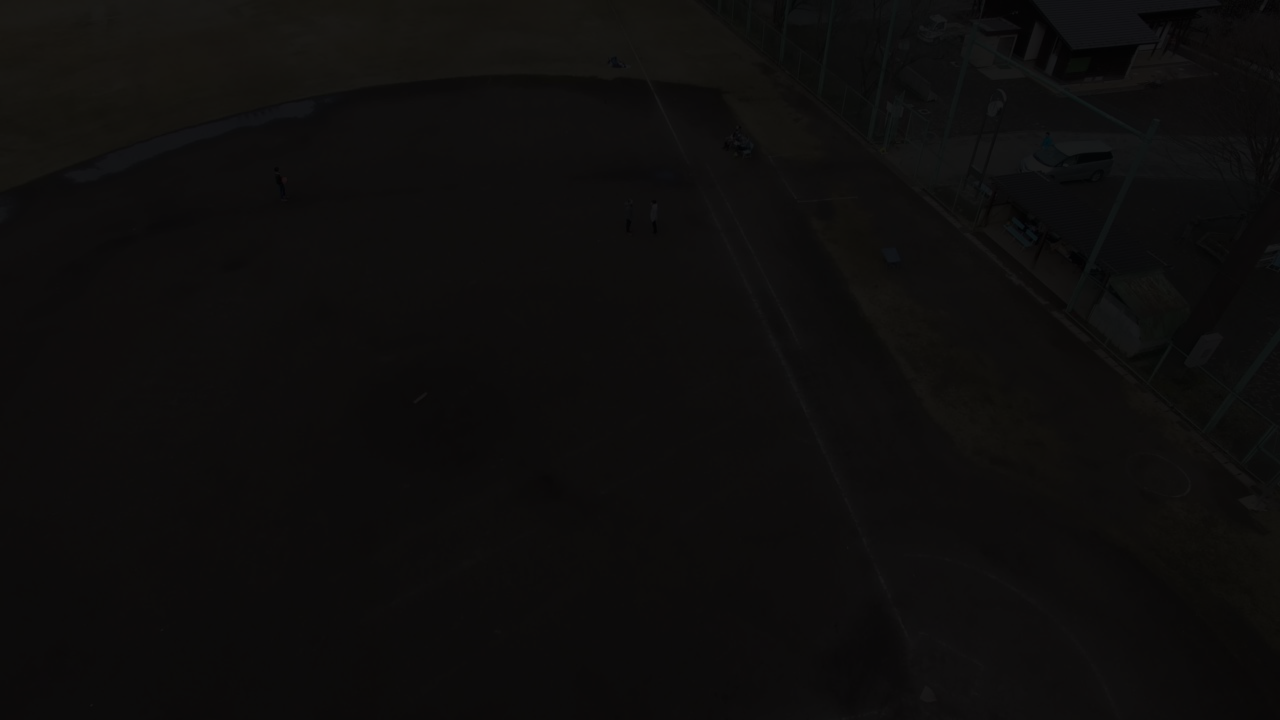

In [56]:
img

In [58]:
img.save('./train_1_1_1_186_night.jpg')

In [67]:
result_tensor = noise(img_tensor,noise_tensor_day,0.3,y_tensor)
img =Image.fromarray(np.array(result_tensor).astype('uint8'))

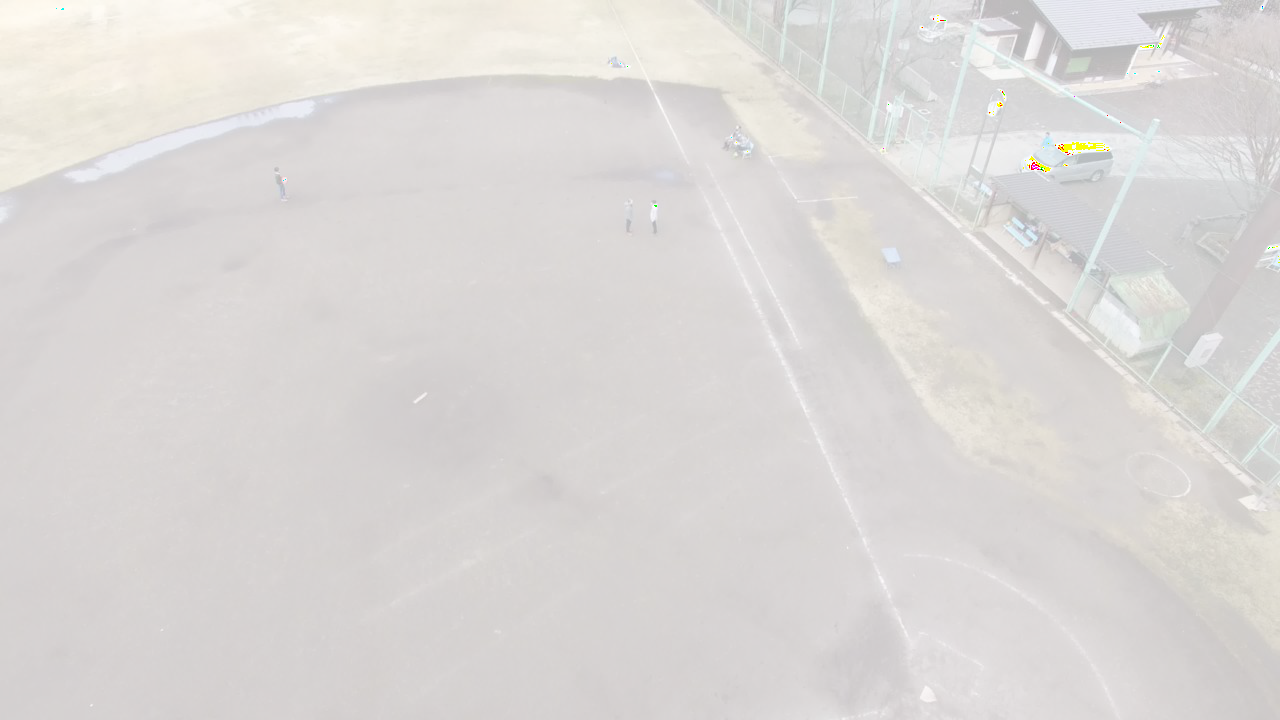

In [68]:
img

In [69]:
img.save('./train_1_1_1_186_day.jpg')

In [106]:
cloud = Image.open( './perlinMap_1_1.png')
cloud_arr = np.asarray(cloud).astype(float)
cloud_tensor=torch.tensor(cloud_arr)

In [72]:
img_tensor.size()

torch.Size([720, 1280, 3])

In [97]:
cloud_tensor.sequeeze().size()

AttributeError: 'Tensor' object has no attribute 'sequeeze'

In [ ]:
img_tensor=torch.tensor(im_arr)

In [107]:
#cloud_tensor=cloud_tensor.repeat(2,2,1)[0:720,0:1280,:]
cloud_tensor=torch.nn.functional.interpolate(cloud_tensor.permute(2,0,1).unsqueeze(0),(720,1280))
cloud_tensor= torch.squeeze(cloud_tensor).permute(1,2,0)


In [108]:
result_tensor = noise(img_tensor,cloud_tensor,0.3,y_tensor)
img =Image.fromarray(np.array(result_tensor).astype('uint8'))
img.save('./train_1_1_1_186_cloud.jpg')

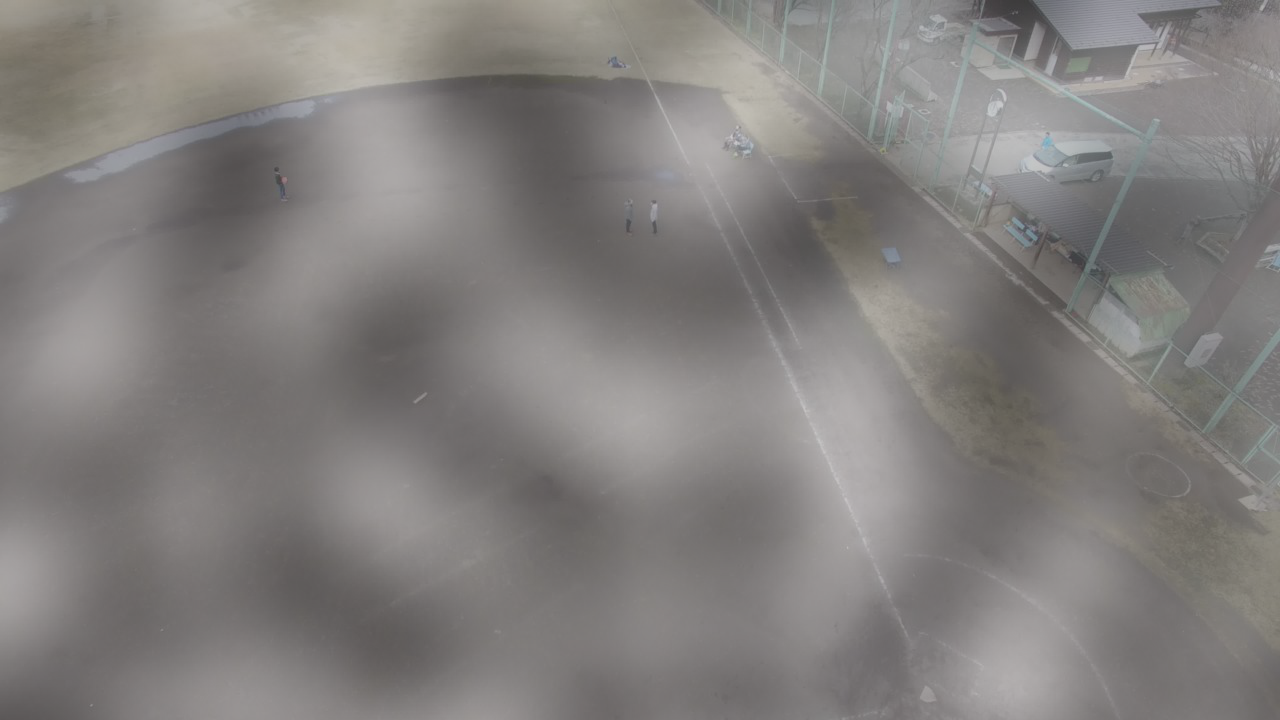

In [109]:
img

In [110]:
fog = Image.open( './perlinMap_4_4.png')
fog_arr = np.asarray(fog).astype(float)
fog_tensor=torch.tensor(fog_arr)
fog_tensor=torch.nn.functional.interpolate(fog_tensor.permute(2,0,1).unsqueeze(0),(720,1280))
fog_tensor= torch.squeeze(fog_tensor).permute(1,2,0)

In [113]:
result_tensor = noise(img_tensor,fog_tensor,0.3,y_tensor)
img =Image.fromarray(np.array(result_tensor).astype('uint8'))
img.save('./train_1_1_1_186_fog.jpg')

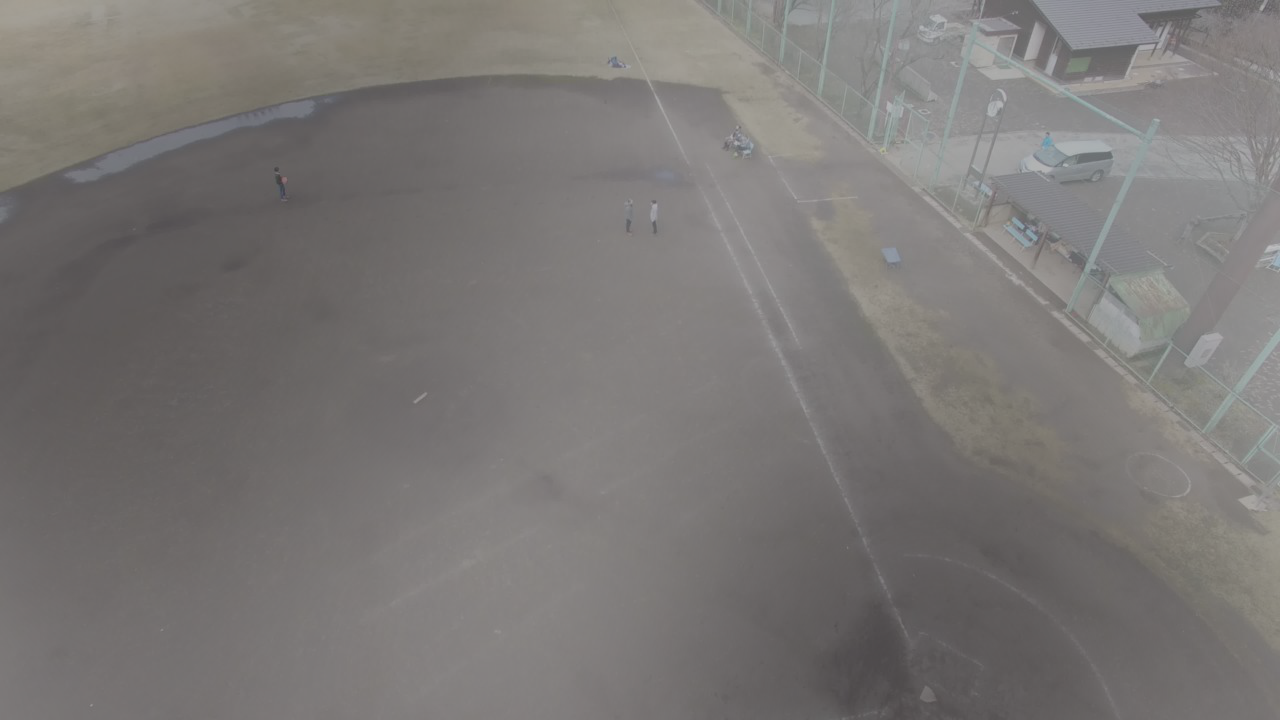

In [114]:
img